In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart_disease.txt',delimiter=',')
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
#Getting our feature and response variables
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X.shape

(270, 4)

In [5]:
#we can check the vif of the dataset here
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

,variables,VIF
0,age,35.050737
1,sex,2.950898
2,BP,39.151839
3,cholestrol,23.469297


- We can remove BP and then again check the vif score

In [6]:
X.drop('BP',axis=1,inplace=True)

C:\Users\Prince\AppData\Local\Temp\ipykernel_9188\683010598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop('BP',axis=1,inplace=True)


In [8]:
X

,age,sex,cholestrol
0,70,1,322
1,67,0,564
2,57,1,261
3,64,1,263
4,74,0,269
...,...,...,...
265,52,1,199
266,44,1,263
267,56,0,294
268,57,1,192


In [10]:
vif

,variables,VIF
0,age,35.050737
1,sex,2.950898
2,BP,39.151839
3,cholestrol,23.469297


In [16]:
vif.drop(index=2,inplace=True)
vif.reset_index(drop=True,inplace=True)

In [18]:
vif['variables'] = X.columns
vif['VIF'] = [variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif

,variables,VIF
0,age,20.661631
1,sex,2.818140
2,cholestrol,18.956804


- still vif score is not below 5 however we will not further drop the columns. Our idea is to practice Random Forest here.

In [20]:
#Lets make the X and y dataframes again
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.33)

In [24]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(oob_score=True,n_estimators= 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [29]:
#checking the oob score
OOB_SCORE = model.oob_score_

In [30]:
#oob error
1 - OOB_SCORE

0.34444444444444444

In [31]:
#Let's checkout the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.6

### Hyperparameter tuning 

In [32]:
rf = RandomForestClassifier(random_state=42,n_jobs=-1)

In [33]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [34]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=rf,param_grid=params,cv = 4,n_jobs=-1,verbose=3,scoring='accuracy')
clf.fit(X_train,y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=3)

In [35]:
clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 10}

In [36]:
clf.best_score_

0.7222222222222222

In [37]:
clf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [44]:
rf_best = clf.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

[Text(0.4027777777777778, 0.9166666666666666, 'cholestrol <= 1.745\ngini = 0.498\nsamples = 109\nvalue = [85, 95]\nclass = No Disease'),
 Text(0.3472222222222222, 0.75, 'age <= -0.151\ngini = 0.494\nsamples = 104\nvalue = [76, 94]\nclass = No Disease'),
 Text(0.1111111111111111, 0.5833333333333334, 'sex <= -0.408\ngini = 0.458\nsamples = 47\nvalue = [49, 27]\nclass = Disease'),
 Text(0.05555555555555555, 0.4166666666666667, 'gini = 0.142\nsamples = 9\nvalue = [12, 1]\nclass = Disease'),
 Text(0.16666666666666666, 0.4166666666666667, 'cholestrol <= 0.368\ngini = 0.485\nsamples = 38\nvalue = [37, 26]\nclass = Disease'),
 Text(0.1111111111111111, 0.25, 'cholestrol <= -0.142\ngini = 0.435\nsamples = 30\nvalue = [34, 16]\nclass = Disease'),
 Text(0.05555555555555555, 0.08333333333333333, 'gini = 0.476\nsamples = 24\nvalue = [25, 16]\nclass = Disease'),
 Text(0.16666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [9, 0]\nclass = Disease'),
 Text(0.2222222222222222, 0.25,

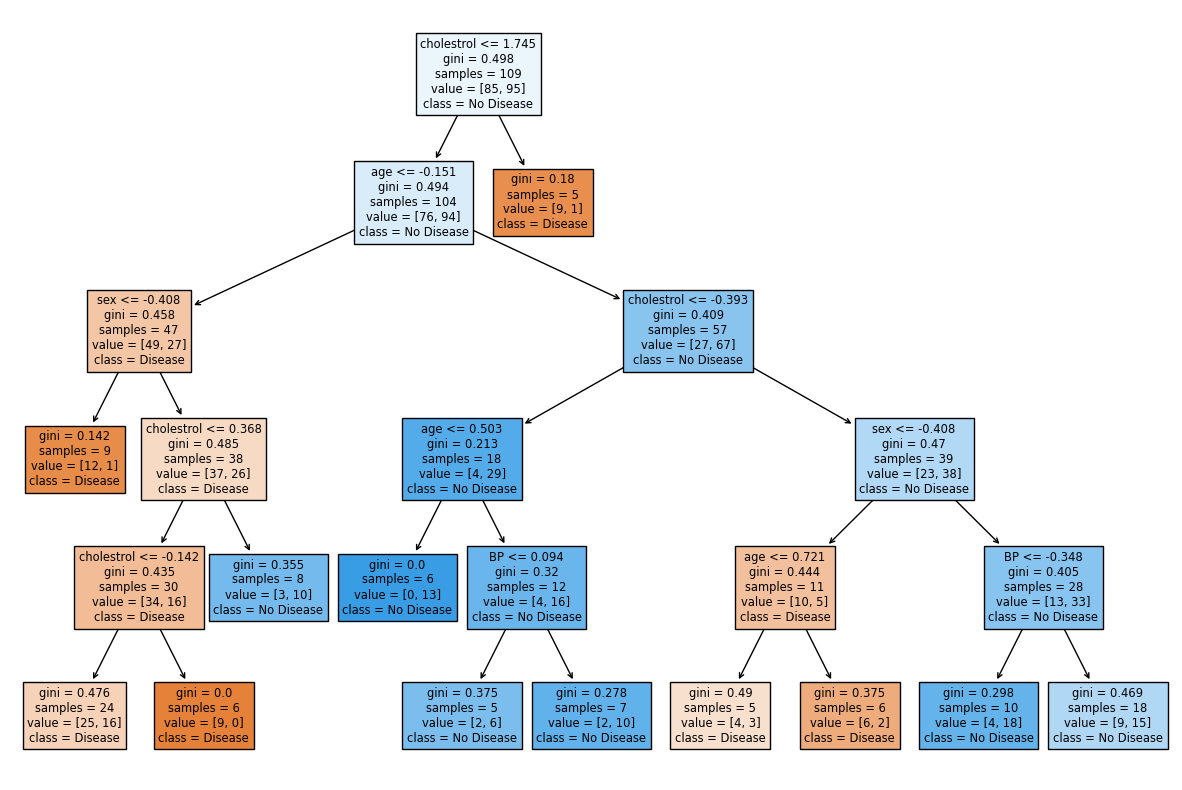

In [49]:
#Lets visualize
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree= rf_best.estimators_[5],feature_names = X.columns,class_names = ['Disease','No Disease'],filled=True)

In [52]:
rf_best.feature_importances_

array([0.40543264, 0.16793916, 0.14703566, 0.27959254])

In [53]:
#checking out the most important features
imp_df = pd.DataFrame({
    'Varname':X.columns,
    'Imp':rf_best.feature_importances_
})
imp_df

,Varname,Imp
0,age,0.405433
1,sex,0.167939
2,BP,0.147036
3,cholestrol,0.279593


In [56]:
#Lets find out the accuracy using the best_estimator
model_final = RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42,oob_score=True)
model_final.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

In [57]:
y_pred_final =model_final.predict(X_test)
score_final = accuracy_score(y_test,y_pred_final)
score_final

0.6777777777777778

- Clearly the accuracy score has improved from 0.60

In [58]:
#oob score
OOB_SCORE_FINAL = model_final.oob_score_
OOB_SCORE_FINAL

0.6722222222222223

In [59]:
#oob error
1 - OOB_SCORE_FINAL

0.3277777777777777